## Hypothesis 2: People in rural regions are more hesitant towards taking the vaccine ##

We have identified rural regions based on literacy index. In India, more that 60% of the population resides in rural regions and at the same time, their literacy index is around 64%.
Sources: 
[1] https://tradingeconomics.com/india/rural-population-percent-of-total-population-wb-data.html#:~:text=Rural%20population%20
[2] https://economictimes.indiatimes.com/news/economy/indicators/literacy-rate-at-71-in-rural-india-86-in-urban-survey/articleshow/47886609.cms?from=mdr

In [1]:
import pandas as pd
import datetime as dt
import geopandas as gpd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [2]:
df = pd.read_csv(r"C:\\Users\\yash0\OneDrive\Desktop\PR\Final Project\Data\cowin_vaccine_data_statewise.csv")
df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated)
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0


df contains all the data of cowin_statewise_vaccination file. To extract the month, I have converted 'Updated On' column from Object to datetime and then used this new column to plot monthly covid vaccinations statewise.

In [3]:
df['Updated On'] = pd.to_datetime(df['Updated On'])

In [5]:
df['month'] = df['Updated On'].dt.month
df.head(10)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated),month
0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,1
1,2021-01-17,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,1
2,2021-01-18,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,1
3,2021-01-19,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,1
4,2021-01-20,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,1
5,2021-01-21,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,1
6,2021-01-22,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,1
7,2021-01-23,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,1
8,2021-01-24,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,1
9,2021-01-25,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1


A few statistics that we calculated to obtain the the percentage share of the 2 most popular Covid-19 vaccines in India.

In [8]:
total_doses = df['Total Doses Administered'].sum()
total_doses

140144280694.0

In [17]:
covaxin = df['Covaxin (Doses Administered)'].dropna()
covaxin_total = covaxin.sum()
percent_covaxin = round((covaxin_total/total_doses),2)
print("% of covidshield doses: "+str(percent_covaxin*100))

covidshield = df['CoviShield (Doses Administered)'].dropna()
covidshield_total = covidshield.sum()
percent_covidshield = round((covidshield_total/total_doses),2)

print("% of covidshield doses: "+str(percent_covidshield*100))

% of covidshield doses: 12.0
% of covidshield doses: 88.0


The cowin dataset consists of India as a state. Hence, as part of cleaning this dataset, I set 'State' column as Index, dropped the value of state == 'India' and the reset index for df dataframe.

In [18]:
df = df.set_index(['State'])
df = df.drop(['India'], axis = 0)
df = df.reset_index()

Further, to anaylze statewise distribution of Covid vaccines and compare it with state's literacy index, I performed a group by operation. This way, I got the statewise data.

In [21]:
doses_by_state = df.groupby(by = 'State', as_index = False).sum()
doses_by_state = doses_by_state.set_index('State')
doses_by_state['Covaxin (Doses Administered)'] = doses_by_state['Covaxin (Doses Administered)']/doses_by_state['Covaxin (Doses Administered)'].max()
doses_by_state['CoviShield (Doses Administered)'] = doses_by_state['CoviShield (Doses Administered)']/doses_by_state['CoviShield (Doses Administered)'].max()
doses_by_state.head()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated),month
State,,,,,,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,3.967746e+07,1234591.0,5651.0,2.971288e+07,9964583.0,1.626504e+07,1.418247e+07,4061.0,0.000000,0.006103,...,1.308863e+07,1.159068e+07,5772271.0,1223324.0,4376537.0,2243271.0,4387523.0,3713987.0,615.0,1719
Andhra Pradesh,3.203438e+09,151509162.0,443095.0,2.370023e+09,833415370.0,1.139487e+09,1.340206e+09,412570.0,0.601403,0.413464,...,8.190528e+08,1.073946e+09,587105569.0,101023557.0,254203320.0,187877645.0,282404176.0,282110452.0,76485.0,1719
Arunachal Pradesh,1.119049e+08,4150155.0,28370.0,8.611796e+07,25786979.0,4.698376e+07,3.814915e+07,22263.0,0.000002,0.017206,...,5.088241e+07,2.475030e+07,9522459.0,7460518.0,8984788.0,3566261.0,11753535.0,9320135.0,7887.0,1719
Assam,1.660918e+09,90202292.0,296509.0,1.348803e+09,312114980.0,7.150506e+08,6.489112e+08,200200.0,0.259385,0.221664,...,7.477405e+08,4.214228e+08,194998578.0,61397631.0,107917402.0,61222783.0,130411866.0,109322106.0,35119.0,1719
Bihar,3.809949e+09,288582339.0,544777.0,3.175415e+09,634533874.0,1.596195e+09,1.427893e+09,624162.0,0.448939,0.527484,...,1.578318e+09,7.907866e+08,655608427.0,145118819.0,225690190.0,264843188.0,349289470.0,311444792.0,113638.0,1719


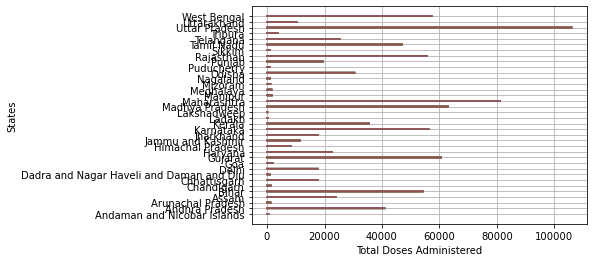

In [23]:
for state in df.State.unique():
    df['State'] == state
    plt.plot(df['Total Doses Administered']/1000, df['State'], label={state})
    plt.xlabel('Total Doses Administered')
    plt.ylabel('States')
    plt.grid(True)

I loaded the literacy index and ruling party datasets of each Indian state (data from wikipedia) to further join it with doses_by_state dataframe. 

In [27]:
literacy = pd.read_csv(r"C:\\Users\\yash0\OneDrive\Desktop\PR\Final Project\Data\Literacy.csv", index_col = 'State').drop(columns = '2001')
literacy = literacy.rename(columns = {'2011':'Literacy'})
literacy.head()

,Literacy
State,
A&N islands,86.27
Andhra Pradesh,67.66
Arunachal Pradesh,66.95
Assam,73.45
Bihar,61.82


In [29]:
ruling_parties = pd.read_csv(r"C:\\Users\\yash0\OneDrive\Desktop\PR\Final Project\Data\ruling_parties.csv")
ruling_parties = ruling_parties.drop(columns = ['S.No.', 'Gvt'])
ruling_parties['State / Union Territory'] = ruling_parties['State / Union Territory'].replace({'Jammu and Kashmir[2]':'Jammu and Kashmir'})
ruling_parties = ruling_parties.rename(columns = {'State / Union Territory' : 'State'})
ruling_parties = ruling_parties.set_index(['State'])
ruling_parties

,Government
State,
Andhra Pradesh,Other
Arunachal Pradesh,Alliance
Assam,Alliance
Bihar,Alliance
Chhattisgarh,Other
Delhi,Other
Goa,Alliance
Gujarat,Same as Center
Haryana,Alliance


As BJP is the Central Ruling Party in India, we renamed the statewise Government as: <br>
1. BJP - Same as Center
2. Alliance - Alliance of Parties including BJP
3. Other - Alliance of parties without BJP

In [30]:
state_with_literacy = pd.merge(doses_by_state, literacy, left_on='State', right_index=True, how='inner')
state_with_literacy = state_with_literacy.reset_index()

combined = pd.merge(state_with_literacy, ruling_parties, left_on='State', right_index=True, how='inner')
combined = combined.reset_index().drop(columns=['index', 'Sessions'])

combined['Total Doses Administered'] = (combined['Total Doses Administered']/combined['Total Doses Administered'].max())*100
combined.head()
# combined = combined.set_index('State')

,State,Total Doses Administered,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated),month,Literacy,Government
0,Andhra Pradesh,43.566906,443095.0,2.370023e+09,833415370.0,1.139487e+09,1.340206e+09,412570.0,0.601403,0.413464,...,587105569.0,101023557.0,254203320.0,187877645.0,282404176.0,282110452.0,76485.0,1719,67.66,Other
1,Arunachal Pradesh,1.521912,28370.0,8.611796e+07,25786979.0,4.698376e+07,3.814915e+07,22263.0,0.000002,0.017206,...,9522459.0,7460518.0,8984788.0,3566261.0,11753535.0,9320135.0,7887.0,1719,66.95,Alliance
2,Assam,22.588558,296509.0,1.348803e+09,312114980.0,7.150506e+08,6.489112e+08,200200.0,0.259385,0.221664,...,194998578.0,61397631.0,107917402.0,61222783.0,130411866.0,109322106.0,35119.0,1719,73.45,Alliance
3,Bihar,51.815475,544777.0,3.175415e+09,634533874.0,1.596195e+09,1.427893e+09,624162.0,0.448939,0.527484,...,655608427.0,145118819.0,225690190.0,264843188.0,349289470.0,311444792.0,113638.0,1719,61.82,Alliance
4,Chhattisgarh,22.933176,530648.0,1.330996e+09,355261793.0,5.883894e+08,5.833266e+08,137942.0,0.163995,0.237892,...,258729677.0,41727384.0,229332983.0,148175206.0,211645756.0,223617997.0,45488.0,1719,71.04,Other


The combined dataset is a join between df, literacy and ruling party data based on state as its key.

Results for Hypothesis 2:

<AxesSubplot:title={'center':'State wise Literacy Index vs Total Covid doses administered'}, xlabel='State'>

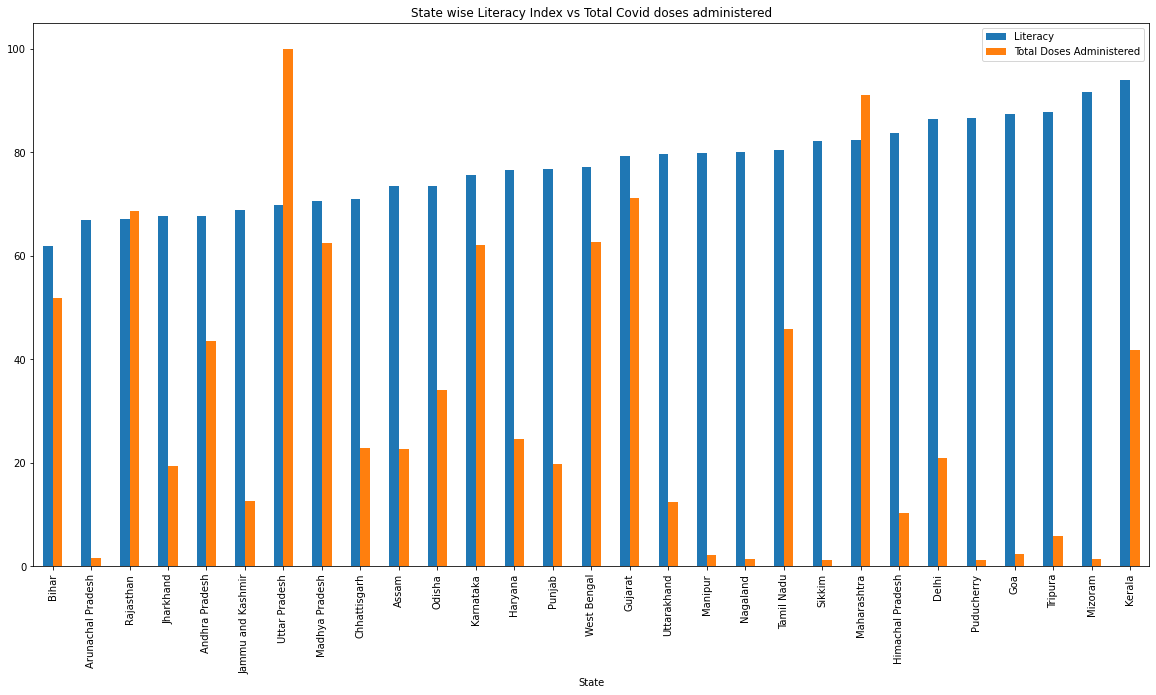

In [32]:
literacy_statewise = combined[['State', 'Literacy', 'Total Doses Administered']]
literacy_statewise = literacy_statewise.set_index(['State']).sort_values(by = 'Literacy')
literacy_statewise.plot(kind = 'bar', figsize = (20,10), title = 'State wise Literacy Index vs Total Covid doses administered')

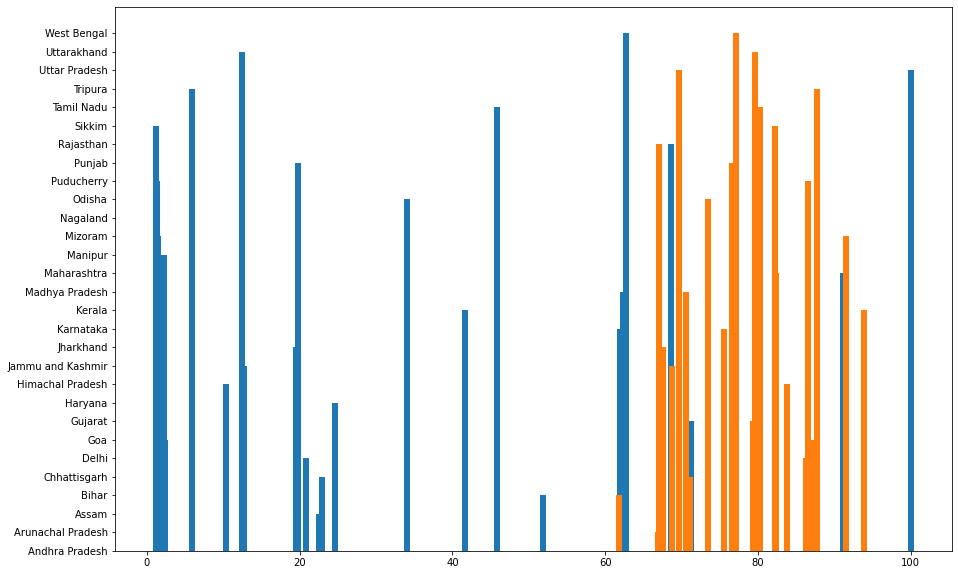

In [43]:
plt.bar(combined['Total Doses Administered'], combined['State'])
plt.bar(combined['Literacy'], combined['State'])
plt.gcf().set_size_inches(15, 10)

In [27]:
doses_by_state['Male (Doses Administered)'] = doses_by_state['Male (Doses Administered)']/doses_by_state['Male (Doses Administered)'].max()
doses_by_state['Female (Doses Administered)'] = doses_by_state['Female (Doses Administered)']/doses_by_state['Female (Doses Administered)'].max()
doses_by_state = doses_by_state.sort_values(by = 'Female (Doses Administered)')
doses_by_state.head()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years (Individuals Vaccinated),45-60 Years (Individuals Vaccinated),60+ Years (Individuals Vaccinated),Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated),month
State,,,,,,,,,,,,,,,,,,,,,
Lakshadweep,9543872.0,1283856.0,2757.0,7070067.0,2473805.0,0.001154,0.001207,460.0,8.831500e-08,0.001469,...,3426900.0,2258554.0,1255474.0,591777.0,925093.0,528243.0,1215081.0,909442.0,192.0,1719
Ladakh,38600907.0,964479.0,6032.0,27788523.0,10812384.0,0.004536,0.004460,2826.0,1.071555e-06,0.005939,...,14459767.0,6752788.0,5329872.0,3240510.0,3040285.0,2759736.0,5156509.0,4308849.0,931.0,1719
Andaman and Nicobar Islands,39677462.0,1234591.0,5651.0,29712879.0,9964583.0,0.004965,0.005414,4061.0,0.000000e+00,0.006103,...,13088629.0,11590679.0,5772271.0,1223324.0,4376537.0,2243271.0,4387523.0,3713987.0,615.0,1719
Dadra and Nagar Haveli and Daman and Diu,78662594.0,5094186.0,14254.0,65736042.0,12926552.0,0.013310,0.008255,13489.0,4.126077e-06,0.012106,...,47353280.0,13476940.0,4409251.0,5253085.0,4123599.0,1741440.0,7232714.0,4406202.0,1445.0,1719
Sikkim,84174958.0,2215366.0,8807.0,62913996.0,21260962.0,0.010634,0.011116,21426.0,3.814030e-06,0.012952,...,36235891.0,17548673.0,10191051.0,3557099.0,7119614.0,4728829.0,8693029.0,7440996.0,2727.0,1719


<AxesSubplot:xlabel='State'>

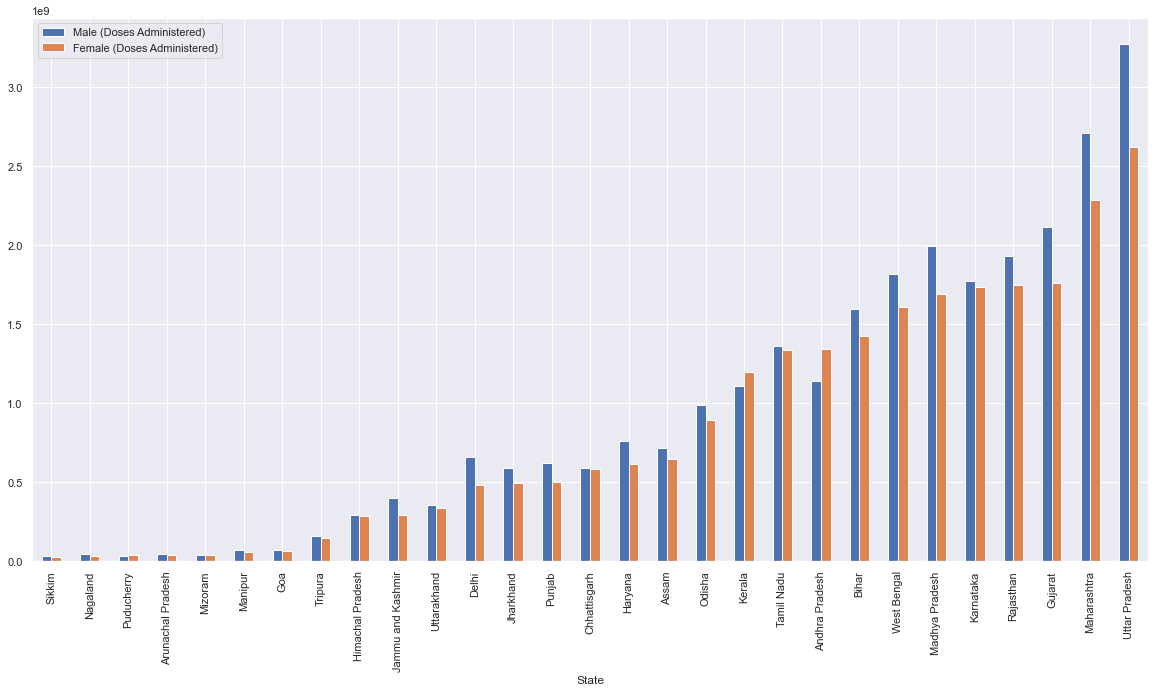

In [28]:
male_vs_female_doses = combined[['Male (Doses Administered)', 'Female (Doses Administered)', 'State']].sort_values('Female (Doses Administered)')
male_vs_female_doses.set_index('State').plot(kind = 'bar', figsize = (20,10), sort_columns = True)

<AxesSubplot:xlabel='State'>

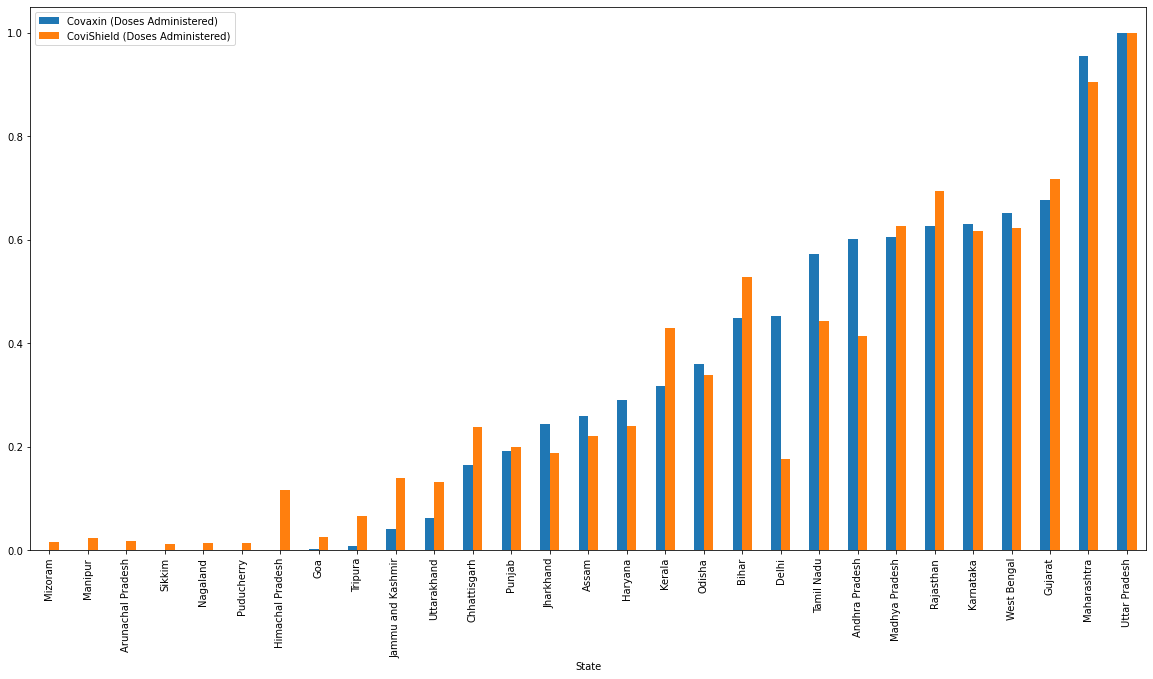

In [44]:
covaxin_vs_covidshield = combined[['Covaxin (Doses Administered)', 'CoviShield (Doses Administered)', 'State']].sort_values(by = 'Covaxin (Doses Administered)')
covaxin_vs_covidshield = covaxin_vs_covidshield.set_index('State')
covaxin_vs_covidshield.plot(kind = 'bar', figsize = (20,10))

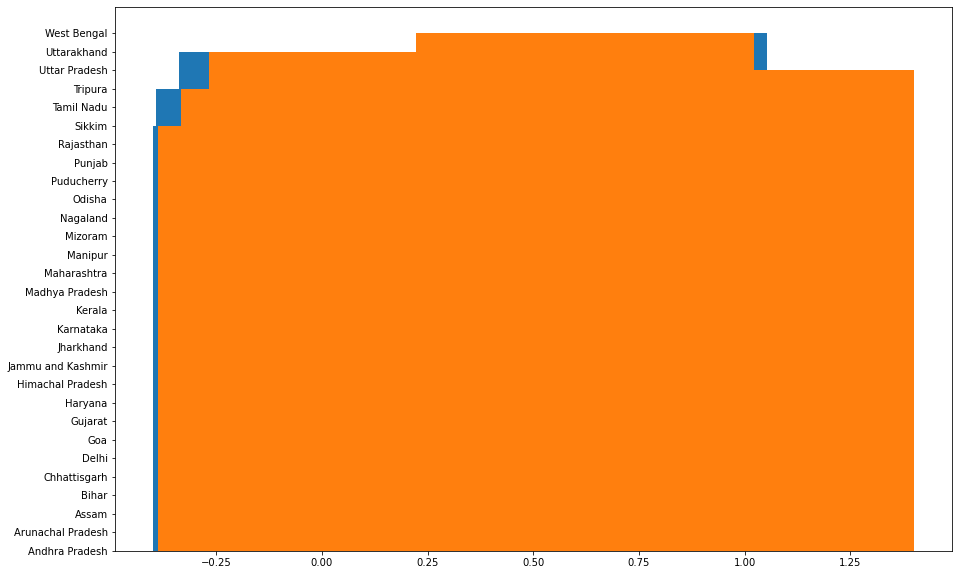

In [45]:
plt.bar(combined['Covaxin (Doses Administered)'], combined['State'])
plt.lin(combined['CoviShield (Doses Administered)'], combined['State'])
plt.gcf().set_size_inches(15, 10)

C:\Users\yash0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


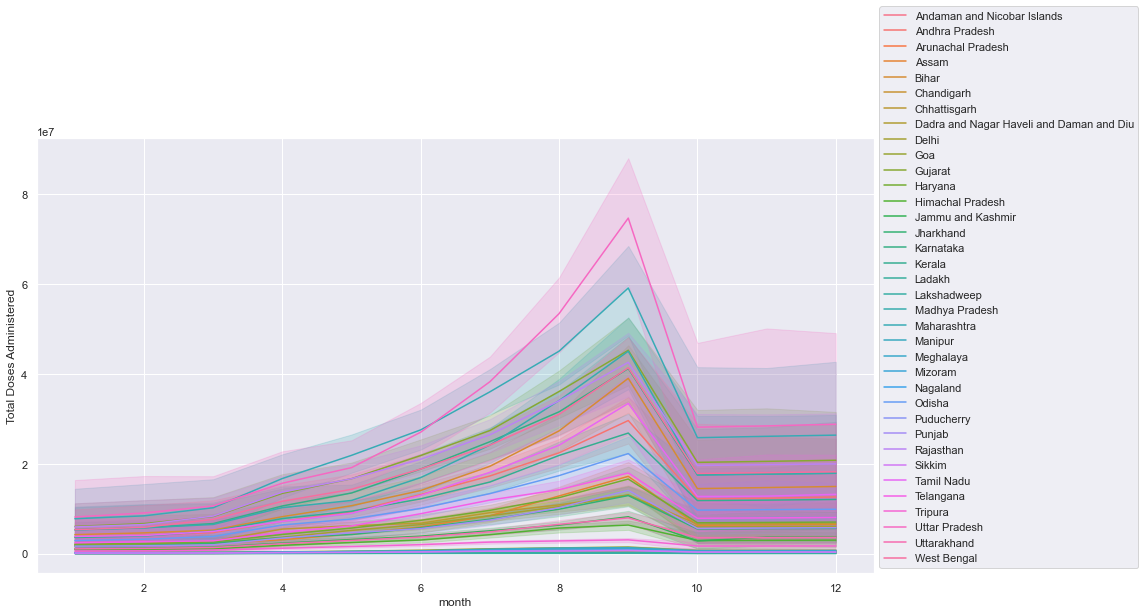

In [46]:
sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.lineplot(df['month'], df['Total Doses Administered'], hue = df['State'])
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)
plt.show()

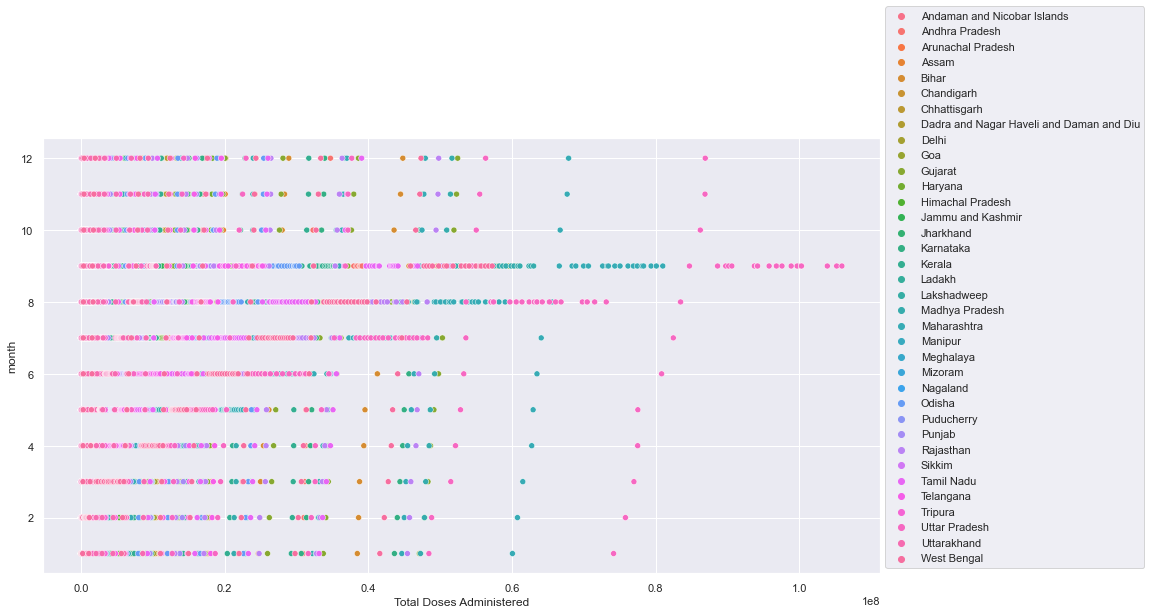

In [62]:
govt_vs_vaccination = combined[['State', 'Total Doses Administered', 'Government']].groupby(['Total Doses Administered', 'Government']).sum()
govt_vs_vaccination
# govt_vs_vaccination = govt_vs_vaccination.set_index(['State', 'Government'])
sns.scatterplot(data=df, y='month', x='Total Doses Administered', hue= 'State')
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)
plt.show()
# sns.scatterplot(data=govt_vs_vaccination, x='State', y='Total Doses Administered',hue= 'Government')
# ax = sns.scatterplot(data=govt_vs_vaccination, x='State', y='Total Doses Administered',hue= 'Government')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

Enter the state: Bihar


C:\Users\yash0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


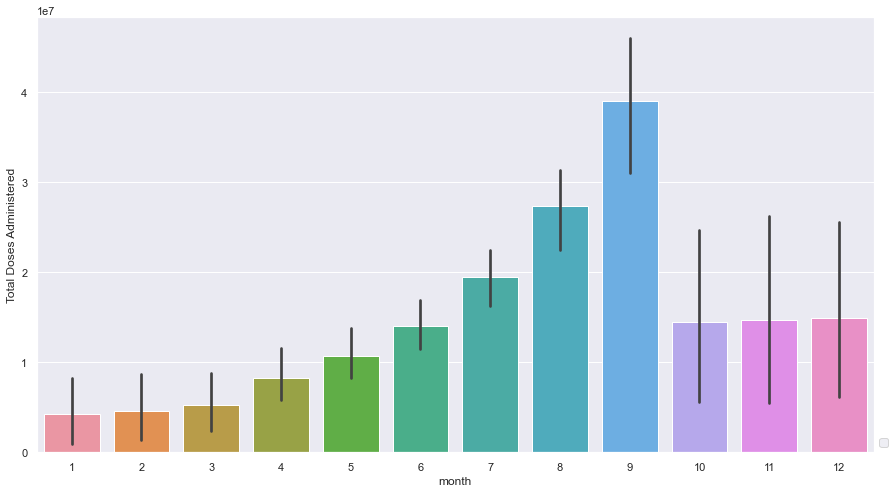

In [65]:
def state_wise_vaccination(state):
    """
    plots a line graph comparing vaccination of the state
    
    """
    state_doses = df[df['State'] == state][['State','Total Doses Administered', 'month']]
    sns.barplot('month', 'Total Doses Administered', data = state_doses)
    plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)
state = input("Enter the state: ")
state_wise_vaccination(state)

References: 
1. https://github.com/91jpark19/2021_Spring_finals/blob/main/Final%20Project%20with%20Doctests.ipynb
2. https://www.geeksforgeeks.org/get-month-from-date-in-pandas-python/